In [8]:
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [14]:
# read the five fastq file
fastq_A_path = "Transcriptome Sample A_fastq"
fastq_B_path = "Transcriptome Sample B_fastq"
fastq_C_path = "Transcriptome Sample C_fastq"
fastq_D_path = "Transcriptome Sample D_fastq"
fastq_E_path = "Transcriptome Sample E_fastq"

fastq1 = SeqIO.parse(fastq_A_path, "fastq")
fastq2 = SeqIO.parse(fastq_B_path, "fastq")
fastq3 = SeqIO.parse(fastq_C_path, "fastq")
fastq4 = SeqIO.parse(fastq_D_path, "fastq")
fastq5 = SeqIO.parse(fastq_E_path, "fastq")

paired = zip(fastq1, fastq2, fastq3,fastq4,fastq5)

fastqA,fastqB,fastqC,fastqD,fastqE =  paired.__next__()

In [15]:
#fastqA.description

Text(0,0.5,'phred_quality')

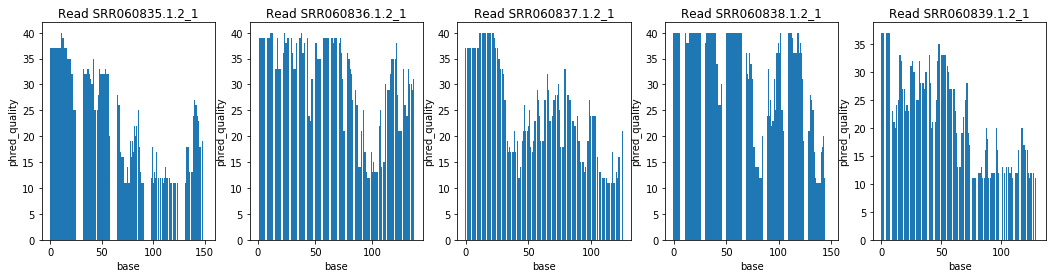

In [16]:
# plot the different phred_quality in each of the five sample (only show the first seq. quality)
fig, axarr = plt.subplots(1, 5)
fig.set_size_inches(18, 4)
axarr[0].bar(np.arange(len(fastqA)), fastqA.letter_annotations["phred_quality"])
axarr[0].set_title("Read {}_1".format(fastqA.id))
axarr[0].set_xlabel("base")
axarr[0].set_ylabel("phred_quality")

axarr[1].bar(np.arange(len(fastqB)), fastqB.letter_annotations["phred_quality"])
axarr[1].set_title("Read {}_1".format(fastqB.id))
axarr[1].set_xlabel("base")
axarr[1].set_ylabel("phred_quality")

axarr[2].bar(np.arange(len(fastqC)), fastqC.letter_annotations["phred_quality"])
axarr[2].set_title("Read {}_1".format(fastqC.id))
axarr[2].set_xlabel("base")
axarr[2].set_ylabel("phred_quality")

axarr[3].bar(np.arange(len(fastqD)), fastqD.letter_annotations["phred_quality"])
axarr[3].set_title("Read {}_1".format(fastqD.id))
axarr[3].set_xlabel("base")
axarr[3].set_ylabel("phred_quality")

axarr[4].bar(np.arange(len(fastqE)), fastqE.letter_annotations["phred_quality"])
axarr[4].set_title("Read {}_1".format(fastqE.id))
axarr[4].set_xlabel("base")
axarr[4].set_ylabel("phred_quality")

In [21]:
# Filtered the seq by discard short seq.
fastqE_long =[]

for record in SeqIO.parse(fastq_E_path, "fastq"):
    if len(record.seq) > 60 :
        # Add this record to our list
        fastqE_long.append(record)

print("Found %i long sequences" % len(fastqE_long))

SeqIO.write(fastqE_long, "fastqE_long.fastq", "fastq")

Found 16529 long sequences


16529

In [22]:
# filtered the seq. by set the quality threshold of 20
fastqE_good =[]

for rec in SeqIO.parse("fastqE_long.fastq", "fastq"):
    if min(rec.letter_annotations["phred_quality"]) >= 20:
        fastqE_good.append(rec)
print("Found %i long sequences" % len(fastqE_good))
SeqIO.write(fastqE_good, "E_good_quality.fastq", "fastq")

Found 842 long sequences


842